# <span style="color:black">Final Project: PM2.5 and weather conditions</span>


* **Name**:  <span style="color:black">{Tomotaka Nishio}</span>
* **Student number**:  <span style="color:black">{1122375994}</span>

<br>

---
# Overview:
### Purpose:

* <span style="color:black">The purpose of this final project is to analyze how much weather conditions affect PM2.5 concentration in Beijing, China. </span>
* <span style="color:black">Key **dependent** variable (DV) is concentration of PM2.5 measured at four places in the city including the US post (the U.S. Embassy) once an hour during a 3-year period from 2013 to 2015. The unit is μg/m³. (Original data have data in 2011 and 2012 but those were deleted due to a significant amount of missing data.</span>
* <span style="color:black">Key **independent** variables IVs are dew point temperature (DEWP), humidity (HUMI), surface pressure (PRES), temperature (TEMP), combined wind direction(cdwd), cumulated wind speed (lws), precipitation (preciptation) and cumulated precipitation (lprec) and, here, only six (later five) variables were analyzed: dew point temperature, humidity, surface pressure, temperature, precipitation and hour (1 to 24).</span>
* <span style="color:black">The IVs are measured about 30000 times and the DV is measured as often as IVs at the U.S. Embassy in Beijing. Although there are some missing data, it seems that about more than 90 percent of the data are valid. (Later, these data were deleted.)</span>
* <span style="color:black">This report focuses on the data at the US_Post data in Beijing. 

<br>

### Dataset source:

<span style="color:black">The data come from the [PM2.5 Data of Five Chinese Cities](https://archive.ics.uci.edu/dataset/394/pm2+5+data+of+five+chinese+cities) dataset from the [UCI Machine Learning repository](https://archive.ics.uci.edu/ml/index.php):
</span>

<span style="color:black">If the dataset has been published, provide relevant reference(s). I have found no citation on the website above. A number of papers seem to use this data but they focus on how to make up missing data.</span>


<br>

---

# Descriptive Statistics

In [1]:
%%capture
import descriptive as dc

In [2]:
dc.display_central_tendency_table(num=1)
dc.display_dispersion_table(num=2)

<br><br><p><span style="font-size: 1.2em;"><b>Table 1</b>: Central tendency summary statistics.</span></p>

,Hour,PM_US_Post,Dew_Point_Temperature,Humidity,Pressure,Temperature,Precipitation
mean,11.0,93.9,2.0,54.0,1016.0,13.0,0.1
median,11.0,66.0,3.0,54.0,1016.0,14.0,0.0
mode,8.0,9.0,18.0,88.0,1006.0,23.0,0.0


<br><br><p><span style="font-size: 1.2em;"><b>Table 2</b>: Dispersion summary statistics.</span></p>

,Hour,PM_US_Post,Dew_Point_Temperature,Humidity,Pressure,Temperature,Precipitation
st.dev.,6.9,94.2,14.0,25.8,10.3,11.8,0.6
min,0.0,1.0,-40.0,2.0,991.0,-17.0,0.0
max,23.0,886.0,26.0,100.0,1046.0,42.0,30.4
range,23.0,885.0,66.0,98.0,55.0,59.0,30.4
25th,5.0,26.0,-9.0,31.0,1008.0,3.0,0.0
75th,18.0,126.0,15.0,76.0,1025.0,23.0,0.0
IQR,13.0,100.0,24.0,45.0,17.0,20.0,0.0


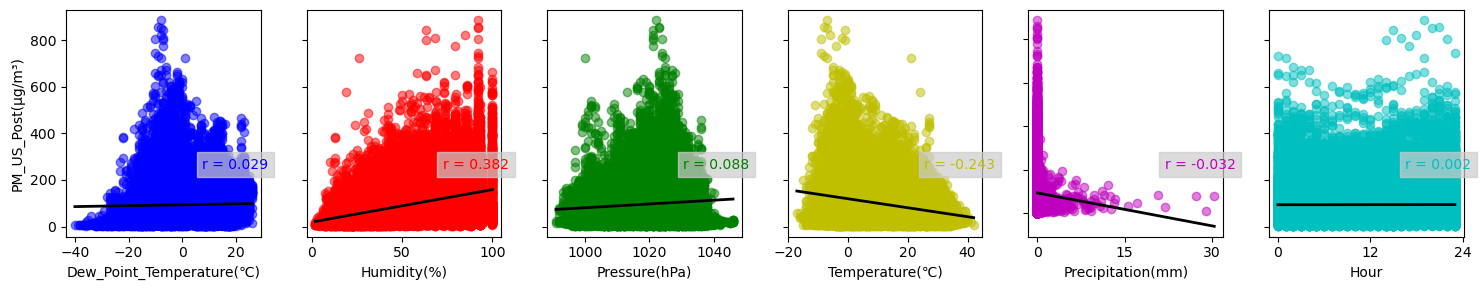

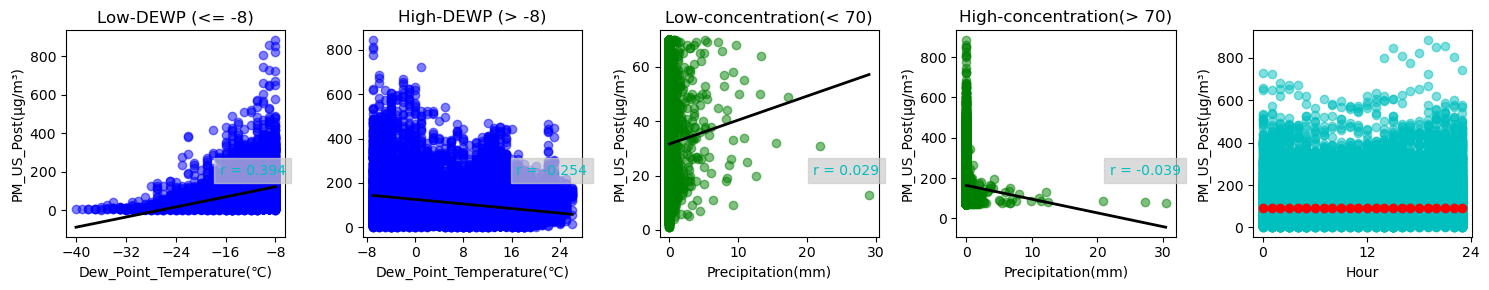

In [3]:
dc.plot_descriptive()

**Fig1**: <br>
Scattor plots of PM2.5 concentration against dew point (DEWP), humidity (HUMI), surface pressure (PRES), temperature (TEMP), precipitation (PREC), and hour (HOUR).<br>
Scatter plots of concentration and DEWP divided at DEWP = -8℃(bottom left)<br>
Scatter plots of PREC and PM2.5 concentration divided at 70 μg/m³ (bottom middle)<br>
A scatter plot of HOUR and concentration with hourly averages (red dots) (bottom right)<br>

The two tables and graphs above provide an overview of the data (Since there were too many missing data, those were deleted from tha data here after.). According to the figures, HUMI and TEMP had a relatively strong correlation with PM2.5 concentration. A slight correlation appeared between DEWP and PM2.5 after dividing DEWP at -8℃, but no such trend was observed for PREC. The red dots in the bottom right graph shows time-based average of PM2.5, which imples that HOUR does not have significant impacts on PM2.5.

---
# Hypthesis testing

In [4]:
%%capture
%run classical.ipynb

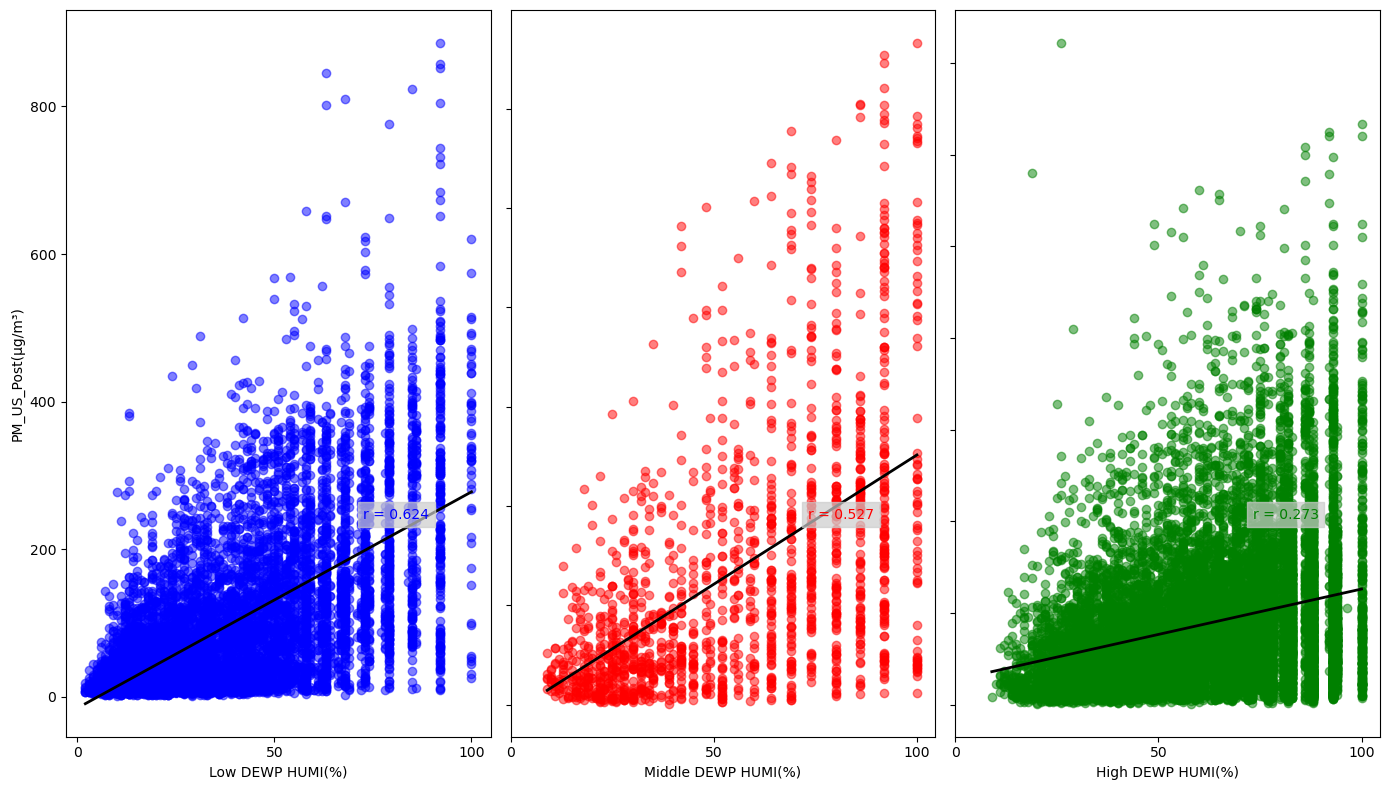

In [5]:
regression_DEWP()

**Fig2**: scatter plots of PM2.5 concentration against HUMI segmented based on DEWP at the same time at thresholds: -2℃ and -5℃. 

**There was a correlation between HUMI and PM2.5, which gets strong as DEWP get low.**
Allmost every hypothesis test (both t-test and regression) between PM and HUMI divided into several groups has p-value that is 0 or very close 0. 
In the left graph, p-value was <0.001.
One of the major reasons seems that the number of data is quite large, which makes p-value very small.
But the p value is less than 0.05, so it can be said correlation coefficient between PM and HUMI of a group whose HUMI is less tha -5℃ will not be 0, and as the left graph argues, the coefficient was quite large.

On the other hand, I found a large p-value, trying regression hypothesis test between PM and TEMP when the temperature is low
the p-value is 0.165
Thus the null hypothesis that the correlation coefficient is 0 was not rejected.
This is interesting because the data as a whole shows relatively high correlation coefficient between PM and TEMP.
The graphs below are scatter plots with their correlation coefficients dividing into four groups based on quartiles

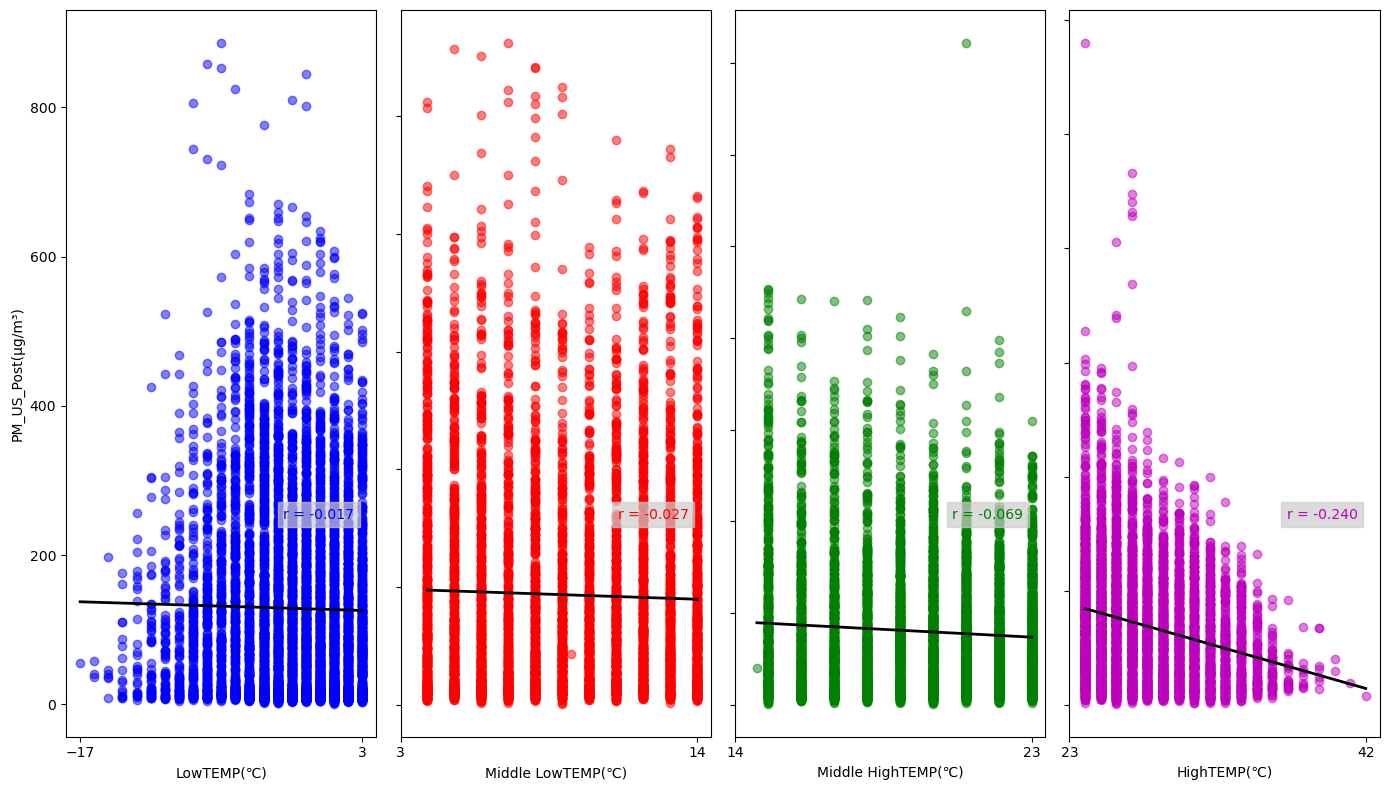

In [6]:
regression_TEMP()

**Fig3**: scatter plots of PM2.5 and TEMP divided based on quartiles: 3℃, 14℃ and 23℃.

It was proved that **there are almost no correlation between PM and TEMP** when the data are divided except high temperature group
though the correlation coefficient between PM and TEMP is relatively high.
The results　also followed the statement above "Thus the null hypothesis that the correlation coefficient is 0 was not rejected."

---
# Machine learning

In this section, label = 0 means PM2.5 concentration is 35 μg/m³ or less and Label = 1 means it is more than 35 μg/m³. The threshold is based on a criteria the Ministry of the Environment of Japan considers as desirable to keep citizens healthy (In this criteria, 35 μg/m³ is an average of a day). However, we want to know how meteorological elements influence the concentration and thus utilized hourly data without averaging.

In [7]:
%%capture
import machine as machine

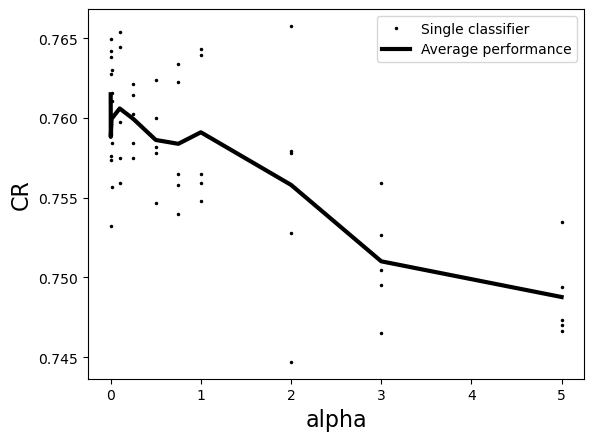

In [8]:
machine.All()

**Fig4**: validation results of machine learning considering the five elements and PM2.5 concentration 

This result shows that the CR of the machine learning considering all the five variables are not so different from or even a little higher at some alphas than the CRs of the machine learnings considering just two variables (some of which exhibited relatively low CRs, even around 0.6). 
Then, to know what climate elements have an impact on the concentration of PM2.5, pca was done.

**Table 3**: The contribution of each variable to pca1 to 5
|Row|DEWP|HUMI|PRES|TEMP|PREC|     
|---|---|---|---|---|---|
|pca1|0.397|0.895|-0.159|0.123|0.002|
|pca2|0.489|-0.383|-0.467|0.636|<0.001|
|pca3|0.370|-0.056|0.867|0.329|-0.002|
|pca4|0.691|-0.220|-0.048|-0.687|-0.017|
|pca5|0.012|-0.006|0.001|0.012|1.000|



**Table 4**: Variance ratios compared to the whole data
|Row|pca1|pca2|pca3|pca4|pca5|
|---|---|---|---|---|---|
|All|0.699|0.277|0.021|0.002|<0.001|

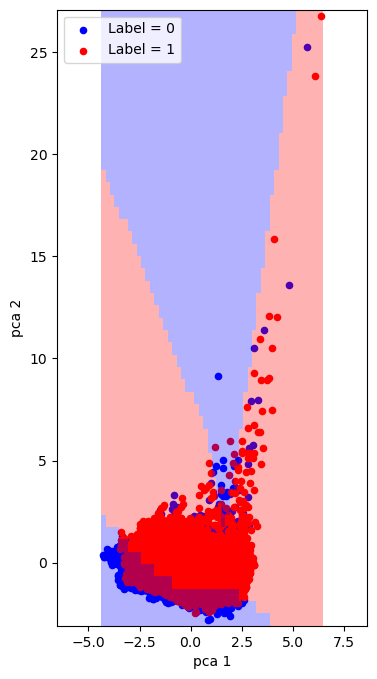

In [9]:
machine.pca1_pca2(machine.x_train_pca,machine.labels_train)

**Fig5**: The scatter plot of pca1 and pca2 and the surface between label 0 (blue) and 1 (red) (without test data to look at the surface) (threshold at 35 μg/m³)


According to the table 1, high DEWP and HUMI have a positive impact on pca1. Thus pca1 appears to mean conditions with easy condensation.Also, high DEWP and TEMP and low HUMI and PRES have a positive influence on pca2. Since HUMI here means relative humidity, though HUMI is low, there is much moisture in the air. Considering low PRES, pca2 seemes to mean atmospheric instability. Thanks to the table 2, it is clear that pca1 and pca2 express a large part of information of the data and, hence, the rest pca (3,4,5) can be ignored here.
<br>
A result validation of pca_1 (tendency to condense) and pca_2 (atmospheric instability) indicated relatively high CRs (around 0.75). Then a scatter of pca1 and pca2 divided into label = 0 (PM2.5 <= 35) and label = 1 (otherwise) and surface between label = 0 amd 1 were described in the graph. Bundles in area with a small number of dots are less likely to happen and, therefore, discussion here focused on the bottom left area. The bottom left blue triangle imply that when the sum of pca1 (how much likely it is to condense) and pca2 (atmospheric instablity) is over a certain threshold, a concentration of PM2.5 is likely to be denser than 35 μg/m³. Comparing the x and y intercepts, it appears that pca2 has more effect on the concentration of PM2.5 than pca1.
<br>
This results might mean that when climate condition in Beijing is calm and humidity is low, concentration of PM2.5 in Beijing is low because high pressure take air with PM2.5 to other places and vice versa. However, we should pay attention to things below. Even though CRs are relatively high, this machine learning could fail to predict the concentration once in four times and, thus, the five climate condition is not appropriate to explain change in concentration of PM2.5. Moreover, it is necessary to know whther there were systematic error with the devise used to gauge due to climate conditons.

---
# Summary

In conclusion, **climate conditions play a significant role in the concentration of PM2.5 in Beijing**. This report has conducted hypothesis tests based on characteristics that appeared in the descriptive analysis. Also, machine learnings with PCA underpinned some results of hypothesis tests. It can be said that, considering the five climate conditions, a small amount of  moisture in the air and a calm weather contribute to low (or healthy level of) PM2.5 concentration in Beijing and it is better to go out on days with such conditions. Other factors such as operation of factories around Beijing or the number of vehicles running there or other ways to analyze the concentration could be researched. 